In [0]:
%matplotlib inline
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA



### Loading the Elmo Model


The model trained on One Billion World Language Model Benchmark (http://www.statmt.org/lm-benchmark/) as been exposed on Tensorflow Hub. This can be loaded as :

In [0]:
elmo = hub.Module("https://tfhub.dev/google/elmo/2", trainable=True)

In [0]:
tokens_input = [["I", "love", "this", "beautiful","work", "by", "Vincent", "Van", "Gogh",""],
                ["Tiya", "works", "really", "hard", "for", "exams", "every", "day","",""],
                ["My", "sister", "likes", "working", "at", "Google","","","",""],
                ["This", "amazing", "work", "was", "done", "in", "the", "early", "nineteenth", "century"],
                ["Hundreds", "of", "people", "work", "in", "this", "building","","",""]]

tokens_length = [9,8,6,10,7]
embeddings = elmo(inputs={"tokens": tokens_input,"sequence_len": tokens_length},
                  signature="tokens",
                  as_dict=True)["elmo"]

In [0]:
layer1 = elmo(inputs={"tokens": tokens_input,"sequence_len": tokens_length},
                  signature="tokens",
                  as_dict=True)["lstm_outputs1"]

layer2 = elmo(inputs={"tokens": tokens_input,"sequence_len": tokens_length},
                  signature="tokens",
                  as_dict=True)["lstm_outputs2"]

In [0]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)


In [0]:
def get_elmo_vectors(tokens_input, layer):
  final_list = []
  for i in range(len(tokens_input)):
    
    X= []
    l1 = []
    
    for j in range(len(tokens_input[i])):
      
      if tokens_input[i][j]=='':
        continue
        
      l1.append(tokens_input[i][j])
      X.append(sess.run(layer[i][j]))
      
    final_list.append(l1)
    X = np.array(X)
    print(X.shape)
    if i == 0 :
      allArrays = X
      continue
    allArrays = np.concatenate((allArrays, X)) 
    
  return allArrays, final_list
  

In [0]:
out_arrays, out_token_list = get_elmo_vectors(tokens_input, embeddings)

(9, 1024)
(8, 1024)
(6, 1024)
(10, 1024)
(7, 1024)


In [0]:
def dim_reduction(X, n):
    pca = PCA(n_components=n)
    print("size of X: {}".format(X.shape))
    results = pca.fit_transform(X)
    print("size of reduced X: {}".format(results.shape))

    for i, ratio in enumerate(pca.explained_variance_ratio_):
        print("Variance retained ratio of PCA-{}: {}".format(i+1, ratio))

    return results

In [0]:
out_arrays_reduce = dim_reduction(X=out_arrays, n=2)

size of X: (40, 1024)
size of reduced X: (40, 2)
Variance retained ratio of PCA-1: 0.0967249795794487
Variance retained ratio of PCA-2: 0.07201884686946869


In [0]:
def pick_color(i):
    if i == 0:
        color = 'ro'
    elif i == 1:
        color = 'bo'
    elif i == 2:
        color = 'yo'
    elif i == 3:
        color = 'go'
    else:
        color = 'co'
    return color

In [0]:
def plot(word, token_list, reduced_X):
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots()

    # plot ELMo vectors
    i = 0
    for j, token in enumerate(token_list):
        color = pick_color(j)
        for _, w in enumerate(token):

            # only plot the word of interest
            if w.lower() in [word, word + 's', word + 'ing', word + 'ed']:
                ax.plot(reduced_X[i, 0], reduced_X[i, 1], color)
            i += 1

    tokens = []
    for token in token_list:
        tokens += token

    # annotate point
    k = 0
    for i, token in enumerate(tokens):
        if token.lower() in [word, word + 's', word + 'ing', word + 'ed']:
            text = ' '.join(token_list[k])

            # bold the word of interest in the sentence
            text = text.replace(token, r"$\bf{" + token + "}$")

            plt.annotate(text, xy=(reduced_X[i, 0], reduced_X[i, 1]))
            k += 1

    
    ax.set_xlabel("PCA 1")
    ax.set_ylabel("PCA 2")

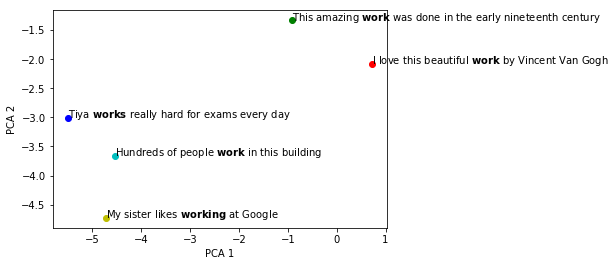

In [0]:
plot("work", out_token_list, out_arrays_reduce)

### Checking out word representations from LSTM layer 1 

(9, 1024)
(8, 1024)
(6, 1024)
(10, 1024)
(7, 1024)
size of X: (40, 1024)
size of reduced X: (40, 2)
Variance retained ratio of PCA-1: 0.10259900987148285
Variance retained ratio of PCA-2: 0.06777151674032211


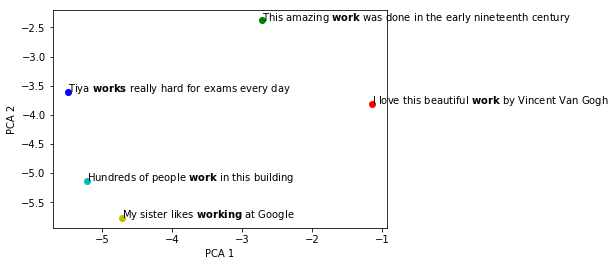

In [0]:
out_arrays, out_token_list = get_elmo_vectors(tokens_input, layer1)
out_arrays_reduce = dim_reduction(X=out_arrays, n=2)
plot("work", out_token_list, out_arrays_reduce)

### Checking out word representations from LSTM layer 2

(9, 1024)
(8, 1024)
(6, 1024)
(10, 1024)
(7, 1024)
size of X: (40, 1024)
size of reduced X: (40, 2)
Variance retained ratio of PCA-1: 0.10060898214578629
Variance retained ratio of PCA-2: 0.07767873257398605


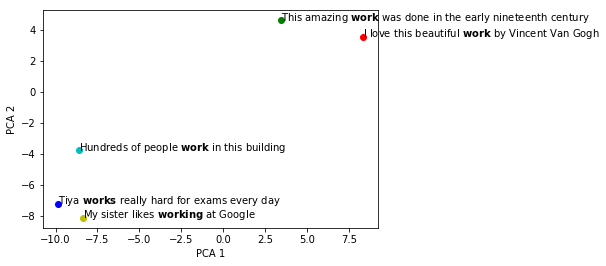

In [0]:
out_arrays, out_token_list = get_elmo_vectors(tokens_input, layer2)
out_arrays_reduce = dim_reduction(X=out_arrays, n=2)
plot("work", out_token_list, out_arrays_reduce)